# Load dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
hr_df = pd.read_csv("..\dataset\hr_data.csv")
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [3]:
# review the columns and data types
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


# Data Processing

## Categorical Columns

In [8]:
hr_df.select_dtypes(exclude=['int64', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [19]:
print(hr_df['department'].unique())
department = hr_df['department'].value_counts()
department

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

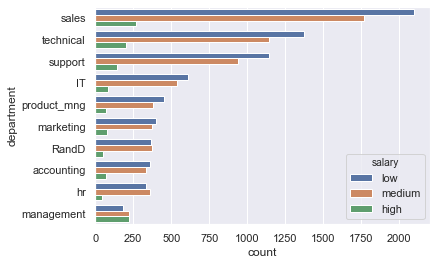

In [63]:
chart = sns.countplot(y='department', data=hr_df, order=hr_df['department'].value_counts().index, hue='salary')
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [57]:
hr_df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [58]:
hr_df['left'].value_counts()


0    11428
1     3571
Name: left, dtype: int64

## Numberical columns

In [56]:
hr_df[hr_df.select_dtypes(['int64', 'float']).columns].describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Load Employee Satisfaction Dataset

In [43]:
# !pip install xlrd
emp_df = pd.read_excel('..\dataset\employee_satisfaction_evaluation.xlsx')
emp_df.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [44]:
emp_df.isnull().sum()

EMPLOYEE #             0
satisfaction_level    27
last_evaluation       27
dtype: int64

## Merge hr data with employee data

In [48]:
df = hr_df.set_index('employee_id').join(emp_df.set_index('EMPLOYEE #'))
df = df.reset_index()
df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [51]:
print('df shape: ', df.shape , '\n', 
'hr_df: ', hr_df.shape, '\n',
'emp_df: ', emp_df.shape, '\n')

df shape:  (14999, 11) 
 hr_df:  (14999, 9) 
 emp_df:  (14999, 3) 

